## Imports

In [1]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
sys.path.append("../src/")

In [3]:
from AutoEncoder import AutoEncoder
from data_handler import get_testing_data

## Model and data loading

In [4]:
from tqdm import tqdm as tqdm

autoencoder = AutoEncoder(input_dim=28 * 28, hidden_dim=200, latent_dim=20).to('cpu').eval()
autoencoder.load_state_dict(torch.load("../autoencoder.pt"))

<All keys matched successfully>

In [7]:
dataloader = get_testing_data()

In [9]:
#Batch of test images
dataiter = iter(get_testing_data())
images, labels = dataiter.next()

#Sample outputs
output, sigma, mu = autoencoder(images)
images = images.numpy()

output = output.view(-1, 1, 28, 28)
output = output.detach().numpy()

In [10]:
#Define the image classes
classes = ["T-shirt/top" ,"Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boo"]

## Compare original vs reconstructed images

Original Images


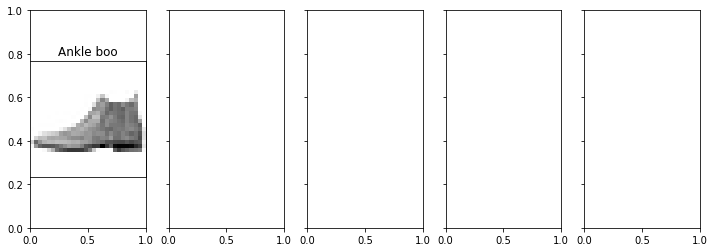

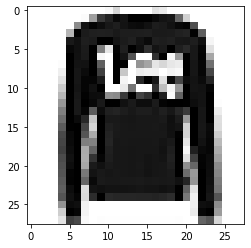

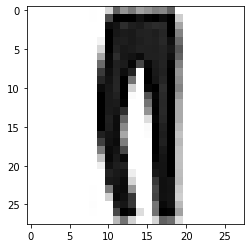

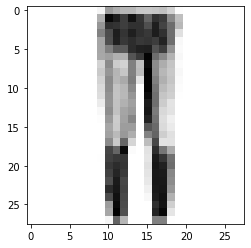

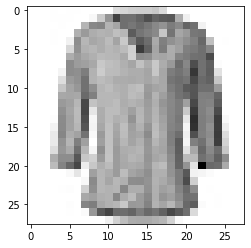

In [13]:
#Original Images
print("Original Images")

fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(12,4))

for idx in np.arange(5):
    ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)), cmap='Greys')
    ax.set_title(classes[labels[idx]])

    plt.show()

Reconstructed Images


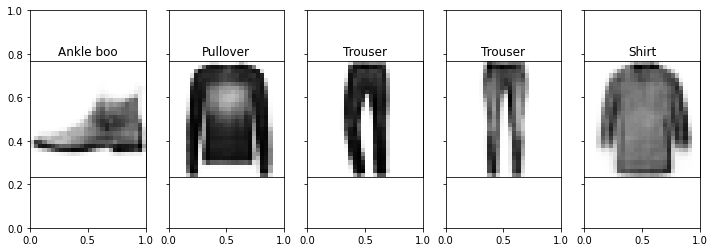

In [12]:
#Reconstructed Images
print('Reconstructed Images')

fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(12,4))

for idx in np.arange(5):
    ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(output[idx], (1, 2, 0)), cmap='Greys')
    ax.set_title(classes[labels[idx]])

plt.show()